# System Neural Diversity 
## An Ensemble

In [1]:
from utils.pack import Pack
from utils.agent import Agent
from utils.metrics import ThoughtDiversity
from collections import defaultdict
import networkx as nx

## Single Agent

In [2]:
embedding_params = ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9]
agent_hilbert = Agent('agent_hilbert_space',
                      'documents/HilbertSpaceMulti.pdf', 1, embedding_params, False)
agent_hilbert.chat_bot.one_question(
    "Imagine how hilbert space could be used in a neural network for neuron representation?")

## Pack

In [3]:
learning_to_act = "chroma_db/agent_ltoa"
system_neural_diversity = "chroma_db/agent_snd"
foundational_models = "chroma_db/agent_foundation"
norbet_cog = "chroma_db/agent_norbert"
viz_quant = "chroma_db/agent_quant"
cot_path = "chroma_db/agent_cot"

embedding_params = [
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.9],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.1],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.5],
    ["facebook-dpr-ctx_encoder-multiset-base", 200, 25, 0.8]
]
# name, path, cot_type, new_bool
agent_specs = [
    ['agent_ltoa', learning_to_act, 0, True],
    ['agent_snd', system_neural_diversity, 0, True],
    ['agent_foundation', foundational_models, 0, True],
    ['agent_quant', viz_quant, 0, True],
    ['agent_norbert', norbet_cog, 0, True],
    ['agent_cot', cot_path, 0, True]
]

test_pack = Pack(agent_specs, embedding_params)

🔥  Conjuring up agent_ltoa  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_ltoa is chroma_db/agent_ltoa

🔥  Conjuring up agent_snd  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_snd is chroma_db/agent_snd

🔥  Conjuring up agent_foundation  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_foundation is chroma_db/agent_foundation

🔥  Conjuring up agent_quant  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_quant is chroma_db/agent_quant

🔥  Conjuring up agent_norbert  🔥 

🧙 creating course  🧙

🔮 creating encoder  🔮 
loading agent...
agent loaded

🧚 creating chat_bot for  🧚

the path  🌈 being used for agent_norbert is chr

In [4]:
edges = test_pack.update_weighted_edges(
    question="Imagine how a neuron for a neural network may be reimagined based on the text.",
    weighted_adj_matrix=None, k=3)
print(edges)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

monte carlo finished
defaultdict(None, {'agent_ltoa': ['agent_snd', 'agent_foundation'], 'agent_snd': ['agent_ltoa', 'agent_foundation'], 'agent_foundation': ['agent_ltoa', 'agent_snd'], 'agent_quant': ['agent_ltoa', 'agent_snd', 'agent_foundation'], 'agent_norbert': ['agent_ltoa', 'agent_snd', 'agent_foundation'], 'agent_cot': ['agent_ltoa', 'agent_snd', 'agent_foundation']})


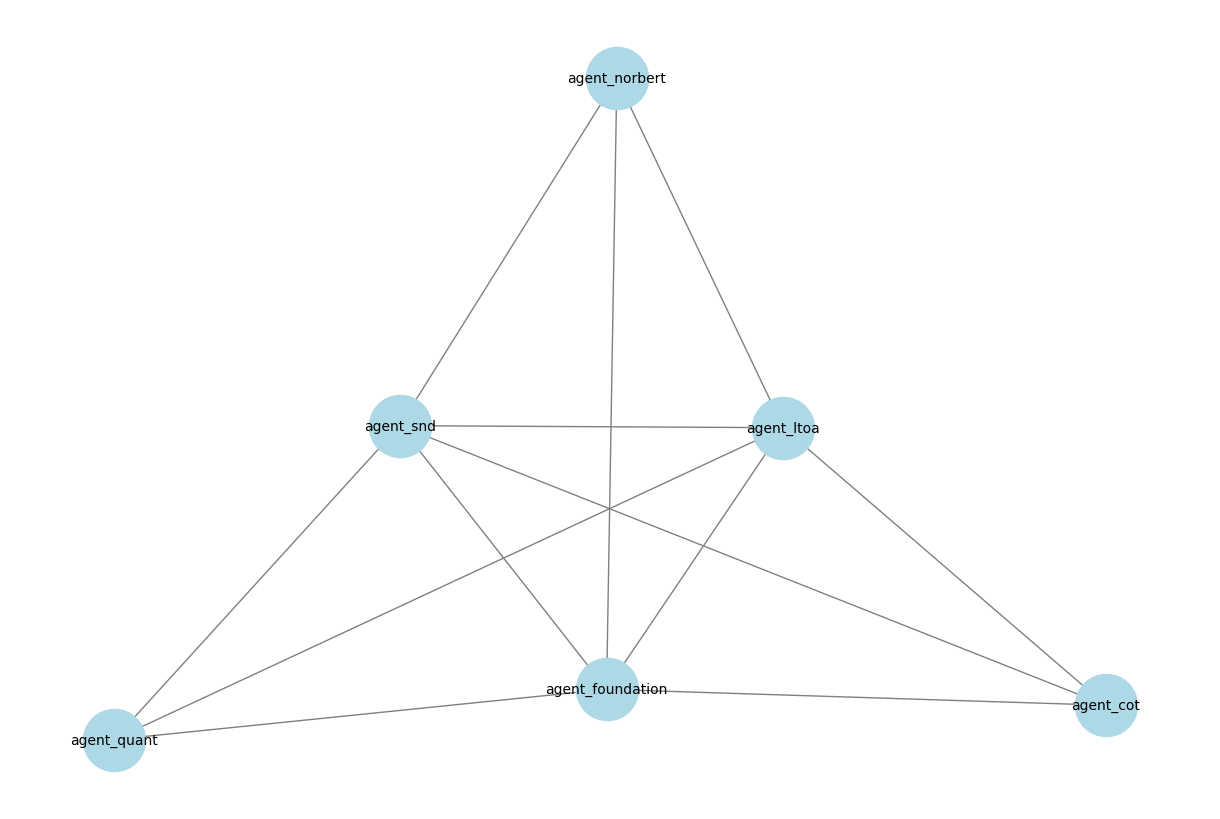

In [5]:
test_pack.graph()

test_pack.graph()

## How weights are made

In [7]:
metrics = ThoughtDiversity(test_pack)
metrics.monte_carlo_sim(
    question="Imagine how AI agents be desinged to be creative?")

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[[2.9845613733269065,
  2.855614368313409,
  2.9945206425059134,
  3.026799104097064,
  2.8735120632919946,
  3.011056186037579],
 [19.777825251839783,
  17.38511479098854,
  19.975782053609095,
  20.63108881852887,
  17.699069424169462,
  20.308838513356523],
 [0.06004415011037528,
  0.003589132243527777,
  0.0008566467917445638,
  0.05587748344370862,
  0.0021831465495303908,
  0.056666666666666664,
  0.05957446808510638,
  0.004166666666666667,
  0.05789473684210526,
  0.003175062578222779,
  0.052500000000000005,
  0.0026145071690490307,
  0.05540780141843971,
  0.0019311094622023605,
  0.0537280701754386]]

In [8]:
metrics.shannon_entropy_scores

[2.9845613733269065,
 2.855614368313409,
 2.9945206425059134,
 3.026799104097064,
 2.8735120632919946,
 3.011056186037579]

In [11]:
metrics.true_diversity_scores

[19.777825251839783,
 17.38511479098854,
 19.975782053609095,
 20.63108881852887,
 17.699069424169462,
 20.308838513356523]

In [13]:
metrics.wasserstein_metrics

[0.06004415011037528,
 0.003589132243527777,
 0.0008566467917445638,
 0.05587748344370862,
 0.0021831465495303908,
 0.056666666666666664,
 0.05957446808510638,
 0.004166666666666667,
 0.05789473684210526,
 0.003175062578222779,
 0.052500000000000005,
 0.0026145071690490307,
 0.05540780141843971,
 0.0019311094622023605,
 0.0537280701754386]